 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [44]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import pandas_datareader.data as web

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [3]:
# l_historical_path = Path("Resources/l_historical.csv")
# otex_historical_path = Path("Resources/otex_historical.csv")
# shop_historical_path = Path("Resources/shop_historical.csv")

whale_returns_path = Path("Resources/whale_returns.csv")

In [4]:
print(Path.cwd())
# l_historical = pd.read_csv(# l_historical_path)
# otex_historical = pd.read_csv(# otex_historical_path)
# shop_historical = pd.read_csv(# shop_historical_path)

whale_returns = pd.read_csv(whale_returns_path,  index_col="Date", infer_datetime_format=True, parse_dates=True)

/Users/guruprasadmulay/Desktop/Bootcamp/MONU-VIRT-FIN-PT-02-2022-U-LOL/Unit 4 Pandas/Homework/Instructions/Starter_Code


In [5]:
# Reading whale returns
whale_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [6]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [7]:
# Drop nulls
whale_returns = whale_returns.dropna().copy()
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [8]:
# Reading algorithmic returns
algo_returns_path = Path("Resources/algo_returns.csv")
algo_returns = pd.read_csv(algo_returns_path, index_col="Date", infer_datetime_format=True, parse_dates=True)

In [9]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [10]:
# Drop nulls
algo_returns = algo_returns.dropna().copy()
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [11]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_history_path = Path("Resources/sp_tsx_history.csv")
sp_tsx_history = pd.read_csv(sp_tsx_history_path,  index_col="Date", infer_datetime_format=True, parse_dates=True)

In [12]:
# Check Data Types

sp_tsx_history.dtypes

Close    object
dtype: object

In [13]:
# Fix Data Types
sp_tsx_history['Close'] = sp_tsx_history['Close'].str.replace("$", " ")
sp_tsx_history['Close'] = sp_tsx_history['Close'].str.replace(",", "")
sp_tsx_history['Close'] = sp_tsx_history['Close'].astype('float')
sp_tsx_history.dtypes


/var/folders/gl/8c7qtydj695ck0zkw13mvcw00000gp/T/ipykernel_4147/1343808537.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp_tsx_history['Close'] = sp_tsx_history['Close'].str.replace("$", " ")


Close    float64
dtype: object

In [14]:
# Calculate Daily Returns
sp_tsx_dr = sp_tsx_history.pct_change()
sp_tsx_dr

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


In [15]:
# Drop nulls
sp_tsx_dr = sp_tsx_dr.dropna().copy()

In [16]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsx_dr.columns = ['SP60']
sp_tsx_dr

,SP60
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [17]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
combined_pd = pd.concat([sp_tsx_dr, whale_returns, algo_returns],  axis="columns", join="inner")
combined_pd

,SP60,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2
Date,,,,,,,
2015-03-03,-0.008530,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949
2015-03-04,-0.003371,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416
2015-03-05,0.001344,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323
2015-03-06,-0.009972,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460
2015-03-09,-0.006555,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303
...,...,...,...,...,...,...,...
2019-04-25,-0.000628,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247
2019-04-26,0.002254,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256
2019-04-29,-0.000788,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

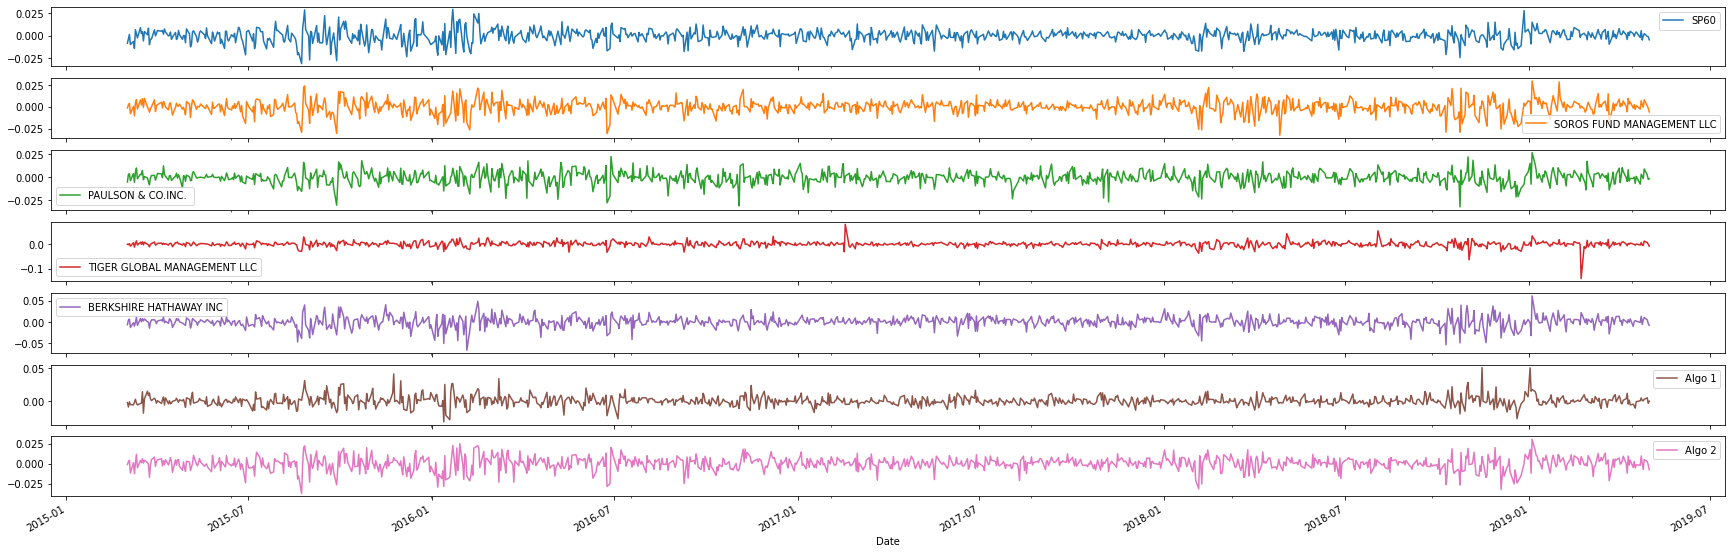

In [18]:
# Plot daily returns of all portfolios
combined_pd.plot(subplots=True, figsize= (30, 10))

#### Calculate and Plot cumulative returns.

In [19]:
combined_pd.head()

,SP60,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2
Date,,,,,,,
2015-03-03,-0.008530,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949
2015-03-04,-0.003371,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416
2015-03-05,0.001344,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323
2015-03-06,-0.009972,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460
2015-03-09,-0.006555,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

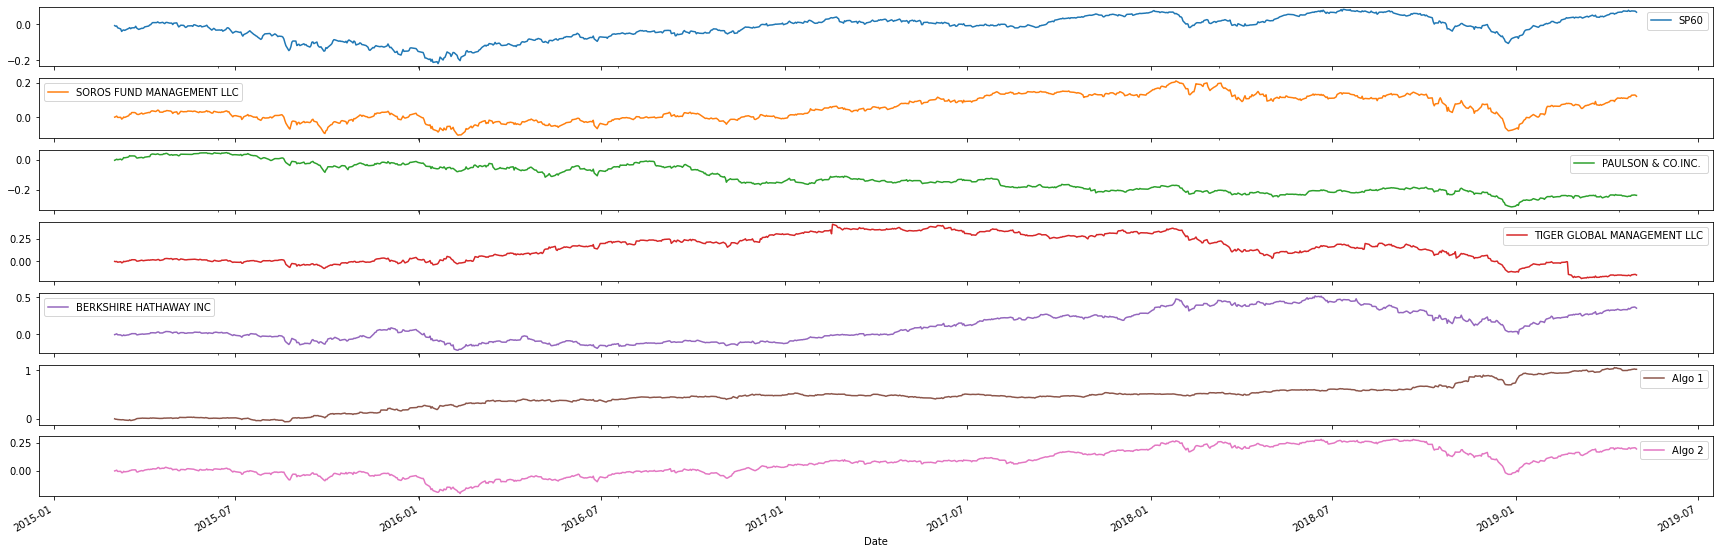

In [20]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_pd).cumprod() - 1
cumulative_returns.plot(subplots=True, figsize= (30, 10))# Plot cumulative returns


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

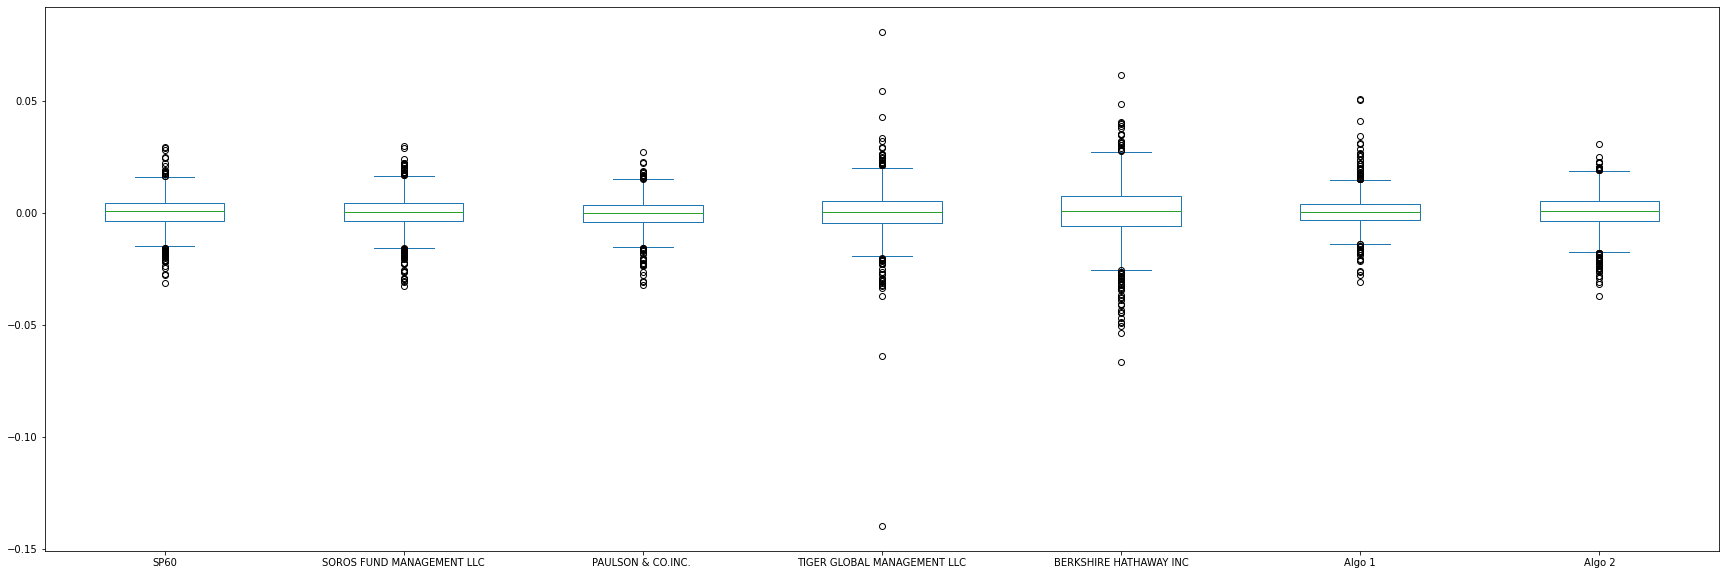

In [21]:
# Box plot to visually show risk
combined_pd.plot(kind="box", figsize= (30, 10))

<AxesSubplot:xlabel='Date'>

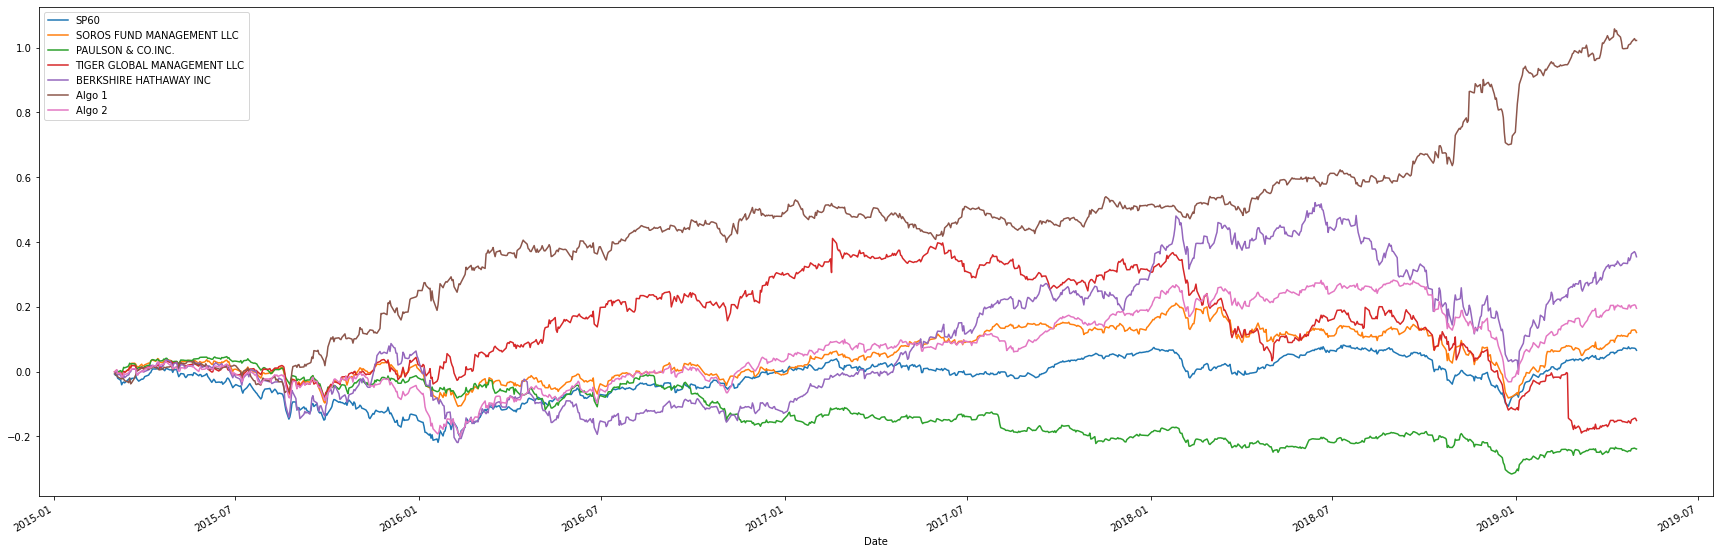

In [22]:
# Plot cumulative returns
cumulative_returns.plot(figsize=(30,10))

### Calculate Standard Deviations

In [23]:
# Calculate the daily standard deviations of all portfolios
combined_pd_std = combined_pd.std()
combined_pd_std

SP60                           0.007034
SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [24]:
# Calculate  the daily standard deviation of S&P TSX 60

# Determine which portfolios are riskier than the S&P TSX 60
print("Following portfolos are riskier than S&P TSX 60 \n")
for column in combined_pd.columns:
    if (combined_pd_std[column] > combined_pd_std['SP60']):
        print(f" * {column}")

Following portfolos are riskier than S&P TSX 60 

 * SOROS FUND MANAGEMENT LLC
 * TIGER GLOBAL MANAGEMENT LLC
 * BERKSHIRE HATHAWAY INC
 * Algo 1
 * Algo 2


### Calculate the Annualized Standard Deviation

In [25]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = combined_pd_std * np.sqrt(252)
annualized_std.head()

SP60                           0.111664
SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

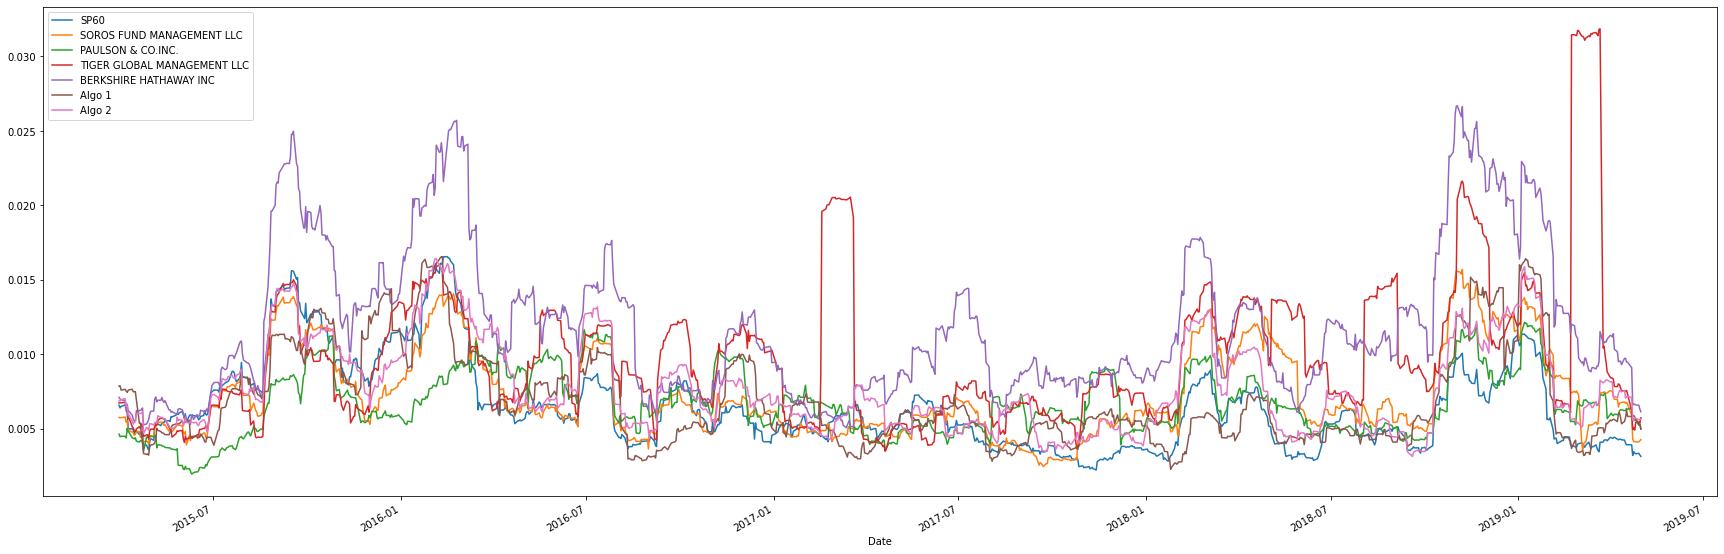

In [26]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
# Plot the rolling standard deviation
combined_pd.rolling(window=21).std().plot(figsize=(30,10))


### Calculate and plot the correlation

In [27]:
# Calculate the correlation
corr_matrix = combined_pd.corr()

# Display de correlation matrix
corr_matrix

,SP60,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2
SP60,1.000000,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370
SOROS FUND MANAGEMENT LLC,0.673930,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667
PAULSON & CO.INC.,0.486511,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015
TIGER GLOBAL MANAGEMENT LLC,0.440583,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689
BERKSHIRE HATHAWAY INC,0.557250,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609
Algo 1,0.310276,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455
Algo 2,0.737370,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

<AxesSubplot:xlabel='Date'>

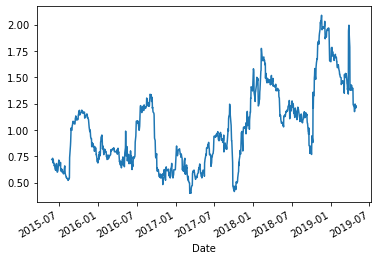

In [28]:
# Calculate covariance of a single portfolio
berkshire_covariance = combined_pd['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(combined_pd['SP60'])
# Calculate variance of S&P TSX
variance = combined_pd['SP60'].rolling(window=60).var()
# Computing beta
berkshire_beta = berkshire_covariance / variance
# Plot beta trend
berkshire_beta.plot()

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [29]:
combined_pd.rolling(window=21).mean()


,SP60,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2019-04-25,0.001231,0.001982,5.009154e-07,0.000489,0.002140,0.000809,0.000926
2019-04-26,0.001405,0.002560,7.854086e-04,0.001281,0.002925,0.000551,0.001389
2019-04-29,0.001300,0.002466,1.246472e-03,0.001296,0.002890,0.000326,0.001248


In [30]:
# Use `ewm` to calculate the rolling window
combined_pd.ewm(halflife='21 days', times=combined_pd.index).mean()

,SP60,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2
Date,,,,,,,
2015-03-03,-0.008530,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949
2015-03-04,-0.005908,0.000511,-0.000802,-0.001532,-0.001089,-0.005320,0.000761
2015-03-05,-0.003410,0.001718,0.000878,-0.000193,0.001603,-0.003817,0.001988
2015-03-06,-0.005133,-0.000808,-0.000291,-0.002369,-0.002256,-0.004116,-0.001542
2015-03-09,-0.005452,-0.000496,0.000724,-0.000524,-0.002121,-0.004415,-0.000903
...,...,...,...,...,...,...,...
2019-04-25,0.001036,0.001442,-0.000019,-0.000738,0.001975,0.000432,0.000835
2019-04-26,0.001092,0.001751,0.000404,-0.000134,0.002365,0.000549,0.001039
2019-04-29,0.001001,0.001727,0.000516,0.000175,0.002504,0.000775,0.001126


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [31]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_pd.mean() * 252) / (combined_pd.std() * np.sqrt(252))
sharpe_ratios.head()

SP60                           0.195550
SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

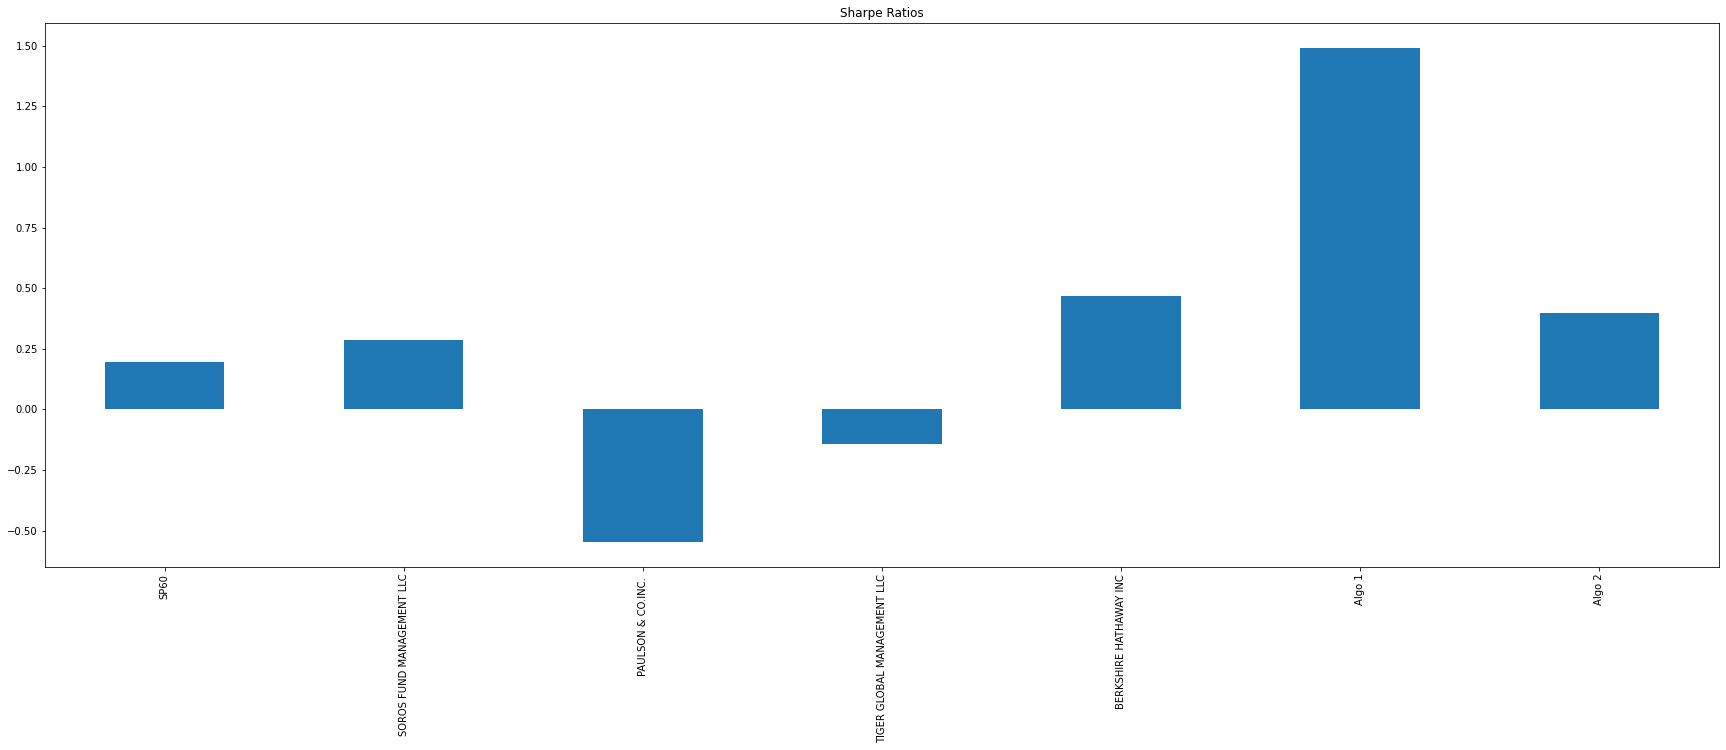

In [32]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar(title="Sharpe Ratios", figsize=(30,10))

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

In [33]:
sharpe_ratios

SP60                           0.195550
SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
dtype: float64

##### Algo1 outperfomed SP60 & whale portfolios
##### Algo2 outperfomed SP60, not whale portfolios

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [45]:
tickers = ['NVDA', 'GOOG', 'AMZN']

data_source = 'yahoo'
start=min(sp_tsx_history.index).strftime('%Y-%m-%d')
end = max(sp_tsx_history.index).strftime('%Y-%m-%d')

for i in tickers:
    web.DataReader(i, data_source, start, end).to_csv(i+'.csv')

2012-10-01, 2019-12-30


In [49]:
# Reading data from 1st stock
amzn_returns_path = Path("AMZN.csv")
amzn_returns = pd.read_csv(amzn_returns_path,  index_col="Date", infer_datetime_format=True, parse_dates=True, usecols=["Date", "Close"])
amzn_returns.head()

,Close
Date,
2012-10-01,252.009995
2012-10-02,250.600006
2012-10-03,255.919998
2012-10-04,260.470001
2012-10-05,258.510010


In [50]:
# Reading data from 2nd stock
goog_returns_path = Path("GOOG.csv")
goog_returns = pd.read_csv(goog_returns_path,  index_col="Date", infer_datetime_format=True, parse_dates=True, usecols=["Date", "Close"])
goog_returns.head()

,Close
Date,
2012-10-01,379.467651
2012-10-02,377.081604
2012-10-03,379.826324
2012-10-04,382.590942
2012-10-05,382.391693


In [51]:
# Reading data from 3rd stock
nvda_returns_path = Path("NVDA.csv")
nvda_returns = pd.read_csv(nvda_returns_path,  index_col="Date", infer_datetime_format=True, parse_dates=True, usecols=["Date", "Close"])
nvda_returns.head()

,Close
Date,
2012-10-01,3.2800
2012-10-02,3.2925
2012-10-03,3.2600
2012-10-04,3.4050
2012-10-05,3.3250


In [52]:
# Combine all stocks in a single DataFrame
combined_stocks_pd = pd.concat([amzn_returns, goog_returns, nvda_returns],  axis="columns", join="inner")
combined_stocks_pd

,Close,Close,Close
Date,,,
2012-10-01,252.009995,379.467651,3.280000
2012-10-02,250.600006,377.081604,3.292500
2012-10-03,255.919998,379.826324,3.260000
2012-10-04,260.470001,382.590942,3.405000
2012-10-05,258.510010,382.391693,3.325000
...,...,...,...
2019-12-23,1793.000000,1348.839966,59.705002
2019-12-24,1789.209961,1343.560059,59.654999
2019-12-26,1868.770020,1360.400024,59.797501


In [71]:
# Reset Date index
combined_stocks_pd_reset_index = combined_stocks_pd.reset_index()
combined_stocks_pd_reset_index.set_index("Date", inplace=True)
combined_stocks_pd_reset_index

,Close,Close,Close
Date,,,
2012-10-01,252.009995,379.467651,3.280000
2012-10-02,250.600006,377.081604,3.292500
2012-10-03,255.919998,379.826324,3.260000
2012-10-04,260.470001,382.590942,3.405000
2012-10-05,258.510010,382.391693,3.325000
...,...,...,...
2019-12-23,1793.000000,1348.839966,59.705002
2019-12-24,1789.209961,1343.560059,59.654999
2019-12-26,1868.770020,1360.400024,59.797501


In [74]:
# Reorganize portfolio data by having a column per symbol
combined_stocks_pd_reset_index.columns = ['AMZN', 'GOOG', 'NVDA']
combined_stocks_pd_reset_index

,AMZN,GOOG,NVDA
Date,,,
2012-10-01,252.009995,379.467651,3.280000
2012-10-02,250.600006,377.081604,3.292500
2012-10-03,255.919998,379.826324,3.260000
2012-10-04,260.470001,382.590942,3.405000
2012-10-05,258.510010,382.391693,3.325000
...,...,...,...
2019-12-23,1793.000000,1348.839966,59.705002
2019-12-24,1789.209961,1343.560059,59.654999
2019-12-26,1868.770020,1360.400024,59.797501


In [75]:
# Calculate daily returns
stocks_daily_returns = combined_stocks_pd_reset_index.pct_change()
# Drop NAs
stocks_daily_returns = stocks_daily_returns.dropna().copy()
# Display sample data
stocks_daily_returns

,AMZN,GOOG,NVDA
Date,,,
2012-10-02,-0.005595,-0.006288,0.003811
2012-10-03,0.021229,0.007279,-0.009871
2012-10-04,0.017779,0.007279,0.044479
2012-10-05,-0.007525,-0.000521,-0.023495
2012-10-08,0.002128,-0.012779,-0.009774
...,...,...,...
2019-12-23,0.003638,-0.000556,-0.002298
2019-12-24,-0.002114,-0.003914,-0.000838
2019-12-26,0.044467,0.012534,0.002389


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [97]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
stocks_daily_returns 
stocks_portfolio_returns = stocks_daily_returns.dot(weights)
# Display sample data
stocks_portfolio_returns


Date
2012-10-02   -0.002691
2012-10-03    0.006212
2012-10-04    0.023179
2012-10-05   -0.010513
2012-10-08   -0.006809
                ...   
2019-12-23    0.000262
2019-12-24   -0.002289
2019-12-26    0.019796
2019-12-27   -0.005135
2019-12-30   -0.014371
Length: 1822, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [103]:
# Join your returns DataFrame to the original returns DataFrame
all_portfolio_returns = pd.concat([stocks_portfolio_returns, combined_pd],  axis="columns", join="inner")
all_portfolio_returns.rename(columns={0: 'Custom Portfolio'}, inplace=True)
all_portfolio_returns.head()

,Custom Portfolio,SP60,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2
Date,,,,,,,,
2015-03-03,-0.005760,-0.008530,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949
2015-03-04,0.001962,-0.003371,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416
2015-03-05,0.011980,0.001344,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323
2015-03-06,-0.015602,-0.009972,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460
2015-03-09,0.000229,-0.006555,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303


In [101]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# No null found
all_portfolio_returns = all_portfolio_returns.dropna().copy()
all_portfolio_returns

,0,SP60,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2
Date,,,,,,,,
2015-03-03,-0.005760,-0.008530,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949
2015-03-04,0.001962,-0.003371,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416
2015-03-05,0.011980,0.001344,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323
2015-03-06,-0.015602,-0.009972,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460
2015-03-09,0.000229,-0.006555,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303
...,...,...,...,...,...,...,...,...
2019-04-25,-0.005363,-0.000628,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247
2019-04-26,-0.004949,0.002254,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256
2019-04-29,0.004271,-0.000788,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [79]:

# Calculate the annualized `std`
all_portfolio_returns_std = all_portfolio_returns.std()
all_portfolio_returns_std

0                              0.016535
SP60                           0.007034
SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

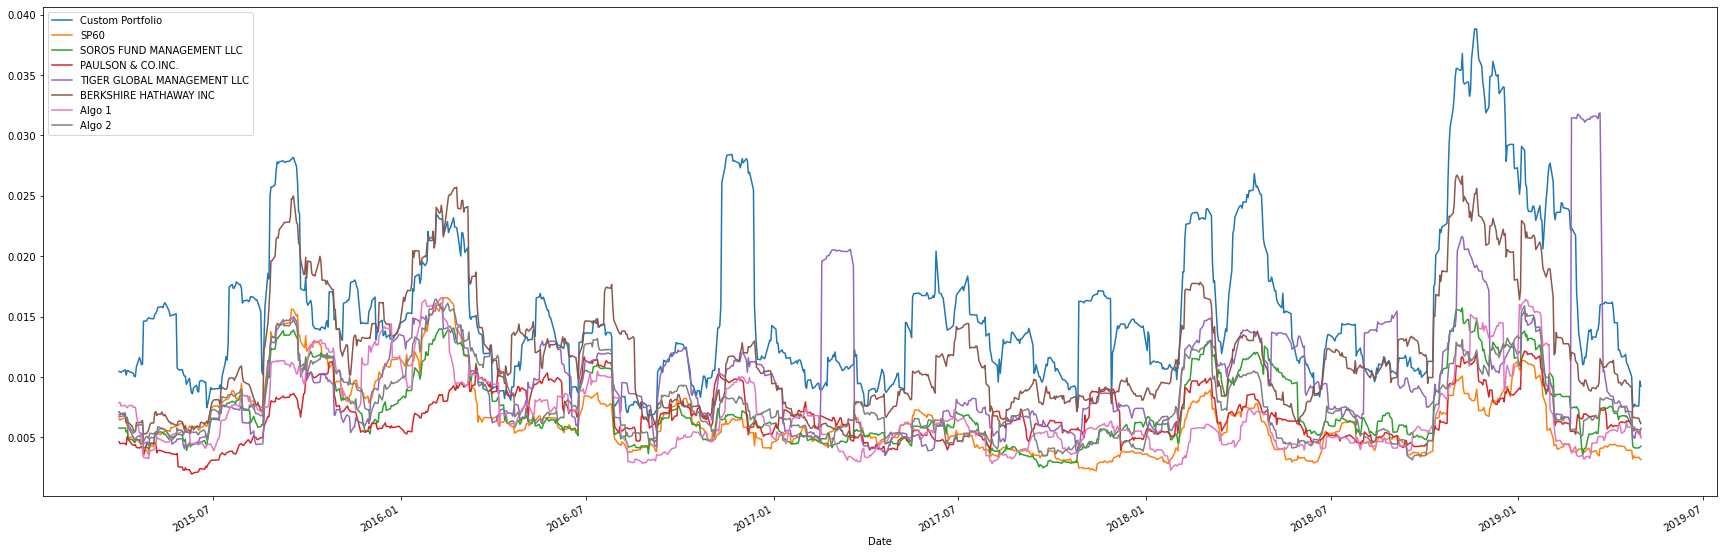

In [104]:
# Calculate rolling standard deviation
all_portfolio_returns_rolling_std = all_portfolio_returns.rolling(window=21).std()

# Plot rolling standard deviation
all_portfolio_returns_rolling_std .plot(figsize=(30,10))


### Calculate and plot the correlation

<AxesSubplot:>

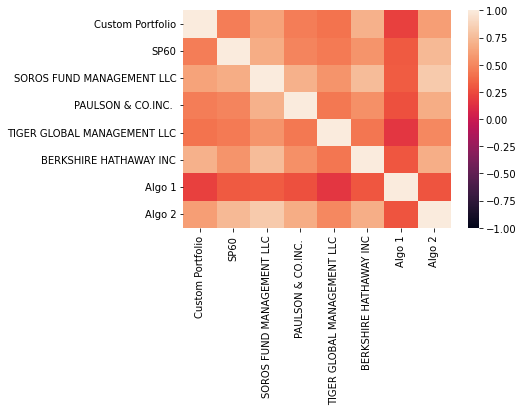

In [108]:
import seaborn as sns
# Calculate and plot the correlation
all_portfolio_returns_matrix = all_portfolio_returns.corr()

# Display de correlation matrix
# all_portfolio_returns_matrix.plot(kind="box")
sns.heatmap(all_portfolio_returns_matrix, vmin=-1, vmax=1)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<AxesSubplot:xlabel='Date'>

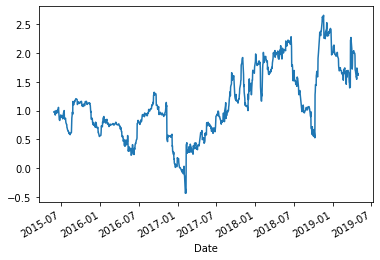

In [109]:
# Calculate and plot Beta

custom_pprtfolop_covar = all_portfolio_returns['Custom Portfolio'].rolling(window=60).cov(all_portfolio_returns['SP60'])
# Calculate variance of S&P TSX
variance = all_portfolio_returns['SP60'].rolling(window=60).var()
# Computing beta
custom_portfolio_beta = custom_pprtfolop_covar / variance
# Plot beta trend
custom_portfolio_beta.plot()

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [110]:
# Calculate Annualized Sharpe Ratios
# Annualized Sharpe Ratios
all_sharpe_ratios = (all_portfolio_returns.mean() * 252) / (all_portfolio_returns.std() * np.sqrt(252))
all_sharpe_ratios.head()

Custom Portfolio               1.420085
SP60                           0.195550
SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
dtype: float64

<AxesSubplot:>

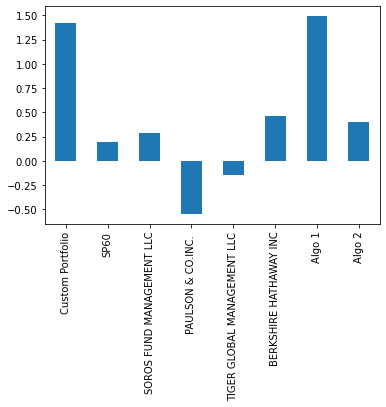

In [112]:
# Visualize the sharpe ratios as a bar plot
all_sharpe_ratios.plot(kind="bar")

### How does your portfolio do?

Write your answer here!

In [132]:
all_sharpe_ratios_dict = dict(all_sharpe_ratios)
print(f"Custom Portfolio ({all_sharpe_ratios_dict['Custom Portfolio']})")
print("--------------------")
for portfolio in all_sharpe_ratios_dict:
    if portfolio != "Custom Portfolio":
        result = "Outperformed" if (all_sharpe_ratios_dict["Custom Portfolio"] > all_sharpe_ratios_dict[portfolio]) else "UnderPerformed"
        print(f"{result}: {portfolio} SR({all_sharpe_ratios_dict[portfolio]})")            

Custom Portfolio (1.4200851810094262)
--------------------
Outperformed: SP60 SR(0.19555028784301404)
Outperformed: SOROS FUND MANAGEMENT LLC SR(0.2867088011085044)
Outperformed: PAULSON & CO.INC.  SR(-0.5475939566788419)
Outperformed: TIGER GLOBAL MANAGEMENT LLC SR(-0.14445528989402717)
Outperformed: BERKSHIRE HATHAWAY INC SR(0.4670452414147496)
UnderPerformed: Algo 1 SR(1.4915139113899516)
Outperformed: Algo 2 SR(0.3968171638196935)
